## OpenPIV tutorial 2

In this notebook we compare the time to run the same analysis using Cython (precompiled) version
with the Python process using FFT and/or direct cross-correlation method

In [1]:
from openpiv import tools, process, scaling, pyprocess, validation, filters
import numpy as np
import pylab
%matplotlib inline

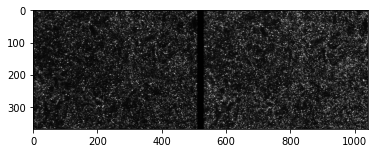

In [2]:
frame_a  = tools.imread( '../test1/exp1_001_a.bmp' )
frame_b  = tools.imread( '../test1/exp1_001_b.bmp' )
pylab.imshow(np.c_[frame_a,np.ones((frame_a.shape[0],20)),frame_b],cmap=pylab.cm.gray)

In [3]:
%%time
u, v, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), 
                                                   window_size=24, overlap=12, dt=0.02, 
                                                   search_area_size=64, 
                                                   sig2noise_method='peak2peak' )
x, y = process.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, mask, 'exp1_001_extended.txt' )

CPU times: user 1.01 s, sys: 12.3 ms, total: 1.03 s
Wall time: 1.03 s


In [4]:
%%time
u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a, frame_b, corr_method='fft', 
                                                     window_size=24, overlap=12, dt=0.02, 
                                                     sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2.5)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, mask, 'exp1_001_fft.txt' )

CPU times: user 690 ms, sys: 9.56 ms, total: 700 ms
Wall time: 700 ms


In [5]:
%%time 
u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a, frame_b, corr_method='direct', window_size=24, overlap=12, dt=0.02, sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2.5)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, mask, 'exp1_001_direct.txt' )

CPU times: user 2.72 s, sys: 4.15 ms, total: 2.73 s
Wall time: 2.73 s


In [6]:
%%time
# the pyprocess uses extended_search_area a bit different from the Cython version
# the main difference is that we prepare as many windows as of the 
# search_area_size and inside those start with the small window of the 
# window_size. This creates a much coarser grid, but we do not need to 
# extrapolate with zeros for all the vectors outside the image. 
# Which approach is the right one, needs to be decided. 


window_size = 24
overlap = 12
search_area_size = 32

u, v, sig2noise = pyprocess.extended_search_area_piv(frame_a, frame_b, 
                                                    window_size=window_size, 
                                                    overlap=overlap, 
                                                    dt=0.02, 
                                                    search_area_size=search_area_size, 
                                                    sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, 
                                 window_size=search_area_size, # note this point
                                 overlap=12 )

CPU times: user 160 ms, sys: 3.46 ms, total: 163 ms
Wall time: 163 ms


In [7]:

u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2.5)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, mask, 'exp1_001_pyprocess_extended.txt' )

In [8]:
# in order to get the same denser field 

window_size = 16
overlap = 12
search_area_size = 24

u, v, sig2noise = pyprocess.extended_search_area_piv(frame_a, frame_b, 
                                                    window_size=window_size, 
                                                    overlap=overlap, 
                                                    dt=0.02, 
                                                    search_area_size=search_area_size, 
                                                    sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, 
                                 window_size=search_area_size, # note this point
                                 overlap=overlap )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2.5)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, mask, 'exp1_001_pyprocess_extended_24.txt' )

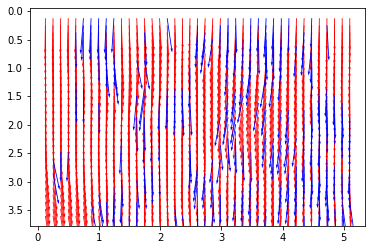

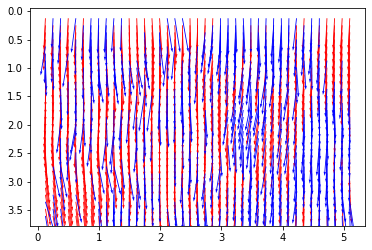

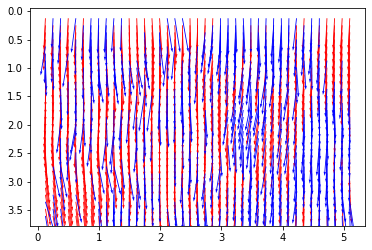

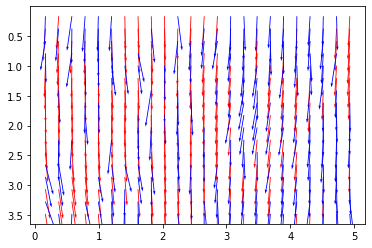

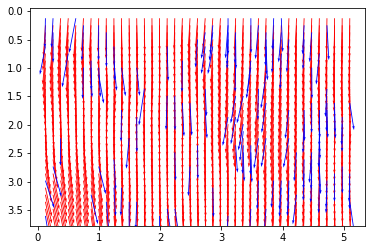

In [9]:
tools.display_vector_field('exp1_001_extended.txt', scale=30, width=0.0025)
tools.display_vector_field('exp1_001_direct.txt', scale=30, width=0.0025)
tools.display_vector_field('exp1_001_fft.txt', scale=30, width=0.0025);
tools.display_vector_field('exp1_001_pyprocess_extended.txt', scale=30, width=0.0025);
tools.display_vector_field('exp1_001_pyprocess_extended_24.txt', scale=30, width=0.0025);